# Цель занятия

* термины - модели, фичи
* знакомство в sklearn


# Что такое машинное обучение

## Область применения

Машинное обучение (от англ. *machine learning*) – это область знаний на стыке линейной алгебры, теории вероятностей и методов оптимизации

говорят, что модель обучается на опыте $E$ относительно класса задач $T$ в смысле меры качества $L$, если при решении задачи $T$ качество, измеряемое мерой $L$ , возрастает при демонстрации нового опыта $D$.

Говоря простым языком, если правльным образом разработать процесс анализа поступающих в систему машинного обучения данных, то система сможет проводить аналогичную обработку без участия разработчика.

Алгоритмы ML используются везде, где нужно автоматизировано (т.е. в большом количестве) принимать решения:

* вычисление спам-писем в почте
* рекомендации товаров в онлайн-ритейле ("с этим товаром покупают")
* подбор музыки на основании вкусов пользователя
* детекция эротических или жестоких сцен в видео контенте

Зачем нужно разрабатывать ML проекты, когда в каждой из областей есть экспертные знания?

* сложно придумать правила  в понятном человеку виде (например, распознавание изображений)
* эвристики устаревают и нужно придумывать новые (борьба со спамом - непрерывный процесс)

## Неформальное определение

Допустим, вы хотите решить какую-то задачу (например, выявление спам-смс) с помощью ML. Независимо от доменной области ML проект проходит следующие этапы:

1. Выгрузка *обучающей выборки* (например, набор смс)
1. Разметка обучающей выборки (отметить те, которые являются спамом). Хотя некоторые алгоритмы могут работать и без разметки.
1. Выбираем метрику качества решения задачи (долю точно определённых спам-смс)
1. Каждый объект выборки описываем некоторыми признаками, которые называются фичами (признаками) (фичами смс могут стать входящие в него слова)
1. Настраиваем выбранную модель машинного обучения наилучшим образом (тут поможет метрика) решать поставленную задачу

Давайте пройдём по пути создания модели машинного обучения для задачи предсказания цены на недвижимость с помощью машинного обучения.

## Пример: предсказываем цены на недвижимость

Предсказывать цены не недвижимость будем с помощью модели [линейной регрессии](https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F)

### Знакомство с machine learning: линейная регрессия

Линейная регрессия относится в задачам обучения с учителем: опыт $D$ (который в ML называют *обучающей выборкой*) в нашем случае - это набор пар $x_i, y_i$ таких, что

$$
D = \{(x_i, y_i) \}_{i=\overline{1,N}}
$$

Где $y_i$ - это "правильный" ответ(цена недвижимости) на обучающем примере $x_i$ (конкретный объект недвижимости из обучающей выборки), а $N$ - количество обучающих примеров. В задаче линейной регрессии $y \in R$, то есть предсказываь нужно  непрерывную *скалярную* случайную величину.

Каждый объект $x_i$ является совокупностью признаков (англ *features*, фичи) $x_i^1,\ldots, x_i^k$. Размерность признакового пространства может быть разной, т.е. $x_i \in R^k$, где $k$ может принимать значения от 1 (в задаче прогнозирования роста человека по его весу) до десятков тысяч (например, в задаче анализа текстов).

#### Отступление: какие фичи бывают

* бинарные (boolean): True/False, 1/0
* категориальные (categorical), иногда говорят дискретные: сутки можно разделить на три категориальных фичи (`morning`, `day` `night`)
* непрерывные (numerical): количество звонков поступающих в коллцентр

Выявить в задаче "сильные" фичи - это 90% успеха в решении.

Про то, как придумывать фичи есть годная [статья на хабре](https://habr.com/ru/company/ods/blog/325422/)

Модель машинного обучения в общем случае  - это семейство алгоритмов $h(x, \theta): X \times \Theta \rightarrow Y$. Процесс машинного обучения сводится к тому, чтобы по опыту (обучающей выборке) $D$ подобрать такую функцию $h(\cdot)$, что мера качества $L$ будет максимальной, т.е. из семейства алгоритмов нам нужно выбрать один конкретный пример.

Обычно задачу машинного обучения сводят к задаче минимизации эмпирического риска $Q(h(x, \theta), D)$ где
$$
Q_{\text{emp}}(h) = \frac{1}{N}\sum_{i=1}^{N}L(h(x_i, \theta), y_i)
$$

Тогда мы находим лучшую модель $\hat{h}$ из семейства $h$ как  
$$
\hat{h} = \arg\min Q_{\text{emp}}(h, \theta)
$$

Точка минимума эмпирического риска является решением уравнения
$$
\frac{\partial Q_{\text{emp}}}{\partial h} = 0
$$

Задача *линейной* регресии: восстановить на функцию $h(x_i)$ в виде *линейной комбинации* (т.е. сумма с некоторыми весами "важности") признаков объекта. Сами признаки называются *предикторами*:
$$
\forall x_i: h(x) = w_0 + w_1x_i^1 + \ldots + w_nx_i^n = \sum_{j=1}^{n}w_jx_i^j = \overline{x}_i^T\overline{w}
$$

Мера качества $L$ для задачи регрессии - квадрат разности между фактическим значением и прогнозом.
$$
L(h(x_i, \theta), y_i) = \left(y_i - h(x_i, \theta)\right)^2 = \left(y_i -  \sum_{j=1}^{n}w_jx_i^j\right)^2
$$

Тогда эмпирический риск вычисляется по формуле:
$$
Q_{\text{emp}} = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y_i})^2 = \frac{1}{N}\sum_{i=1}^{N}(y_i - \overline{x}_i^T\overline{w})^2 = \frac{1}{2N}||\overline{Y}-\overline{X}^T\overline{w}||^2 = \frac{1}{2N}\left(\overline{Y}-\overline{X}^T\overline{w}\right)^T\left(\overline{Y}-\overline{X}^T\overline{w}\right)
$$


Такой вид функции потерь называется RSS - *resudal squares sum*, на русский переводится как *остаточная сумма квадратов*.

Где $\hat{y_i}$ - ответ нашего алгоритма машинного обучения $h(x, \theta)$ на примере $x_i$. Чем больше значение $L$ (т.е. чем ближе оно к нулю, т.к. берём со знаком минус) тем лучше наша модель повторяет опыт $X \in m \times n$ где m - количество примеров в обучающей выборке, а $m$ - размерность пространства признаков. $w$ - это вектор параметров модели, который хотим обучить.

Мимнимум эмпирического риска можно найти аналитически, он достигается в точке
$$
\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}
$$

Реализуем функцию для обучения линейной регрессии на python.


### Подгружаем данные

Для начала скопируйте в корень гугл диска (своего) директорию с данными https://drive.google.com/drive/folders/1f0xJzIxfsfI_QbE6VB82W7xkcxTipgkP?usp=sharing

In [1]:
import logging
import os
import sys
import shutil

import numpy as np

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)  # гарантируем воспроизводимость

run_env = os.getenv('RUN_ENV', 'COLLAB')
if run_env == 'COLLAB':
  from google.colab import drive
  ROOT_DIR = '/content/drive'
  drive.mount(ROOT_DIR)
  print('Google drive connected')
  root_data_dir = os.path.join(ROOT_DIR, 'MyDrive', 'ml_course_data')
  sys.path.append(os.path.join(ROOT_DIR, 'MyDrive', 'src'))
else:
  root_data_dir = os.getenv('DATA_DIR', '/srv/data')

print(os.listdir(root_data_dir))

if not os.path.exists(root_data_dir):
  raise RuntimeError('Отсутствует директория с данными')
else:
  print('Содержимое директории %s: %s' % (root_data_dir, os.listdir(root_data_dir)))

['client_segmentation.csv', 'messages.db', 'labeled_data_corpus.csv', 'content_description.csv', 'nltk_data', 'content_catalog.zip', 'user_item_views.zip', 'pipelines-data', 'zinc_data', 'model.cb', 'content_views.csv.gz', 'nltk-data', 'Health_and_Personal_Care.jsonl.gz', 'geo_points.csv.gzip', 'clustering.pkl', 'eigen.pkl', 'boosting_toy_dataset.csv', 'mlflow', 'test_dataset.pkl', 'models', 'ground_truth_dataset.pkl', 'minio', 'rtb_classification_data.csv.gz', 'final_dataset.zip', 'content_views.csv', 'logs', 'ocr_dataset.zip', 'content_description.csv.gz', 'task.csv', 'scored_corpus.csv', 'meta_Health_and_Personal_Care.jsonl.gz', 'best_model.cb', 'brand_tweets.csv', 'brand_tweets_valid.csv']
Содержимое директории /Users/adzhumurat/PycharmProjects/ai_product_engineer/data: ['client_segmentation.csv', 'messages.db', 'labeled_data_corpus.csv', 'content_description.csv', 'nltk_data', 'content_catalog.zip', 'user_item_views.zip', 'pipelines-data', 'zinc_data', 'model.cb', 'content_views.c

In [3]:
from utils import load_sales

sales_dataset = load_sales(root_data_dir)

features = sales_dataset.data # матрица X
y = sales_dataset.target # таргет (целевая переменная)

print('Фичи')
print(features[:4])
print('\nЦелевая переменная y')
print(y[:10])
print()
print(f'Размерность матрицы объеуты-признаки {features.shape}')
print()
print(f"текстовое описание датасета {sales_dataset.DESCR}")

Фичи
[[  713.         28086.1        35896.57857143 32894.7
  29984.71        2909.99      ]
 [  914.         33842.85       36032.02857143 34254.63
  37121.96       -2867.33      ]
 [ 1169.         43853.89       37403.35142857 53815.46
  43101.19       10714.27      ]
 [ 1107.         45753.27       36251.61       41043.85
  43549.01       -2505.16      ]]

Целевая переменная y
[33842.85 43853.89 45753.27 43931.43 30419.51 30432.31 29013.9  31967.8
 41587.55 55728.61]

Размерность матрицы объеуты-признаки (47, 6)

текстовое описание датасета QTy, NetSales_Previous_Day, Avg_Sale_Previous_Week, Sales_This_Day_Last_Week, Sales_This_Day_Week_Before_Last, Diff_Sales_This_Day_Last_Week_And_Week_Before_Last


Визуализируем целевую переменную в виде диаграмы рассеяния

/var/folders/bd/bg2rzktd7cl7_q4_11m4dx7r0000gn/T/ipykernel_78539/1635718260.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


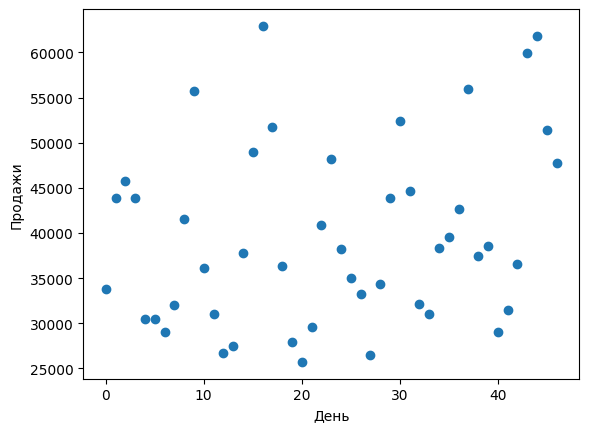

In [4]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

fig, subplot = plt.subplots()
plt.scatter(
    np.arange(features.shape[0]),
    y
)
subplot.set_xlabel('День')
subplot.set_ylabel('Продажи')
fig.show()

В теоретическом разделе много формул, но к счастью вся математика уже реализована на python, программировать все операции вручную необязательно

In [5]:
from numpy.linalg import inv, norm
from sklearn.linear_model import LinearRegression

# обучаем модель "из коробки"
reg = LinearRegression().fit(features, y)

print(f"Коэффициенты, вычисленные моделью sklearn {reg.coef_}")

Коэффициенты, вычисленные моделью sklearn [ 2.60638883e+01 -6.61105470e-02 -2.61133512e-01 -3.23008980e+13
  3.23008980e+13  3.23008980e+13]


Визуализируем решение

/var/folders/bd/bg2rzktd7cl7_q4_11m4dx7r0000gn/T/ipykernel_78539/2473106303.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


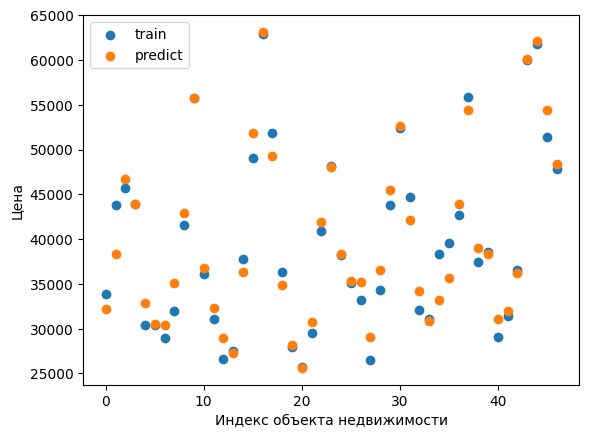

In [6]:
from matplotlib import pyplot as plt

%matplotlib inline

fig, subplot = plt.subplots()
# истинные значения
plt.scatter(
    np.arange(features.shape[0]),
    y, label='train'
)
# предсказанные значения
plt.scatter(
    np.arange(features.shape[0]),
    reg.predict(features), label='predict'
)
subplot.legend()
subplot.set_xlabel('Индекс объекта недвижимости')
subplot.set_ylabel('Цена')
fig.show()

### Метрики качества линейной регрессии

В задачах машинного обучения мы хотим сравнивать несколько моделей машинного обучения и выбирать ту из них, которая наилучшим образом решает нашу задачу. Решение о том, какая модель хорошая, а какая плохая, принимается на основе одной или нескольких *метрик* моделей машинного обучения.

Метрики принимают на вход два вектора - предсказания модели и истинные значения, после чего вычисляют по этим векторам качество модели.

Несколько метрик лучше, чем одна `¯\_(ツ)_/¯` . Поэтому обычно для модели смотрят за изменением сразу нескольких метрик - при росте какой-нибудь одной метрики другие не должны просаживаться.

Для начала получим два вектора: истинные ответы на обучающей выборке и значения, предсказанные нашеё моделью

In [7]:
y_pred = reg.predict(features)
y_true = y

Построим гистрограмму распределения ошибок

/var/folders/bd/bg2rzktd7cl7_q4_11m4dx7r0000gn/T/ipykernel_78539/440621352.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


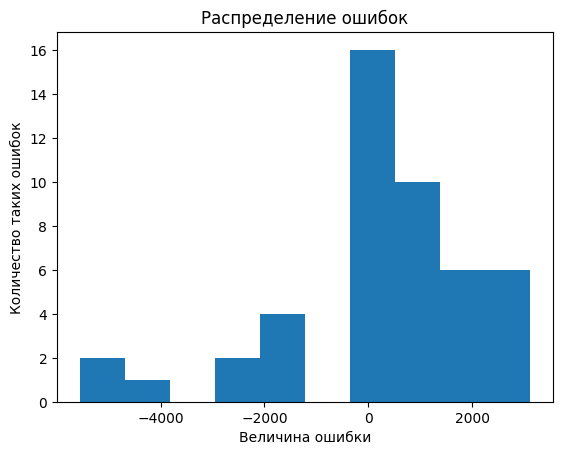

In [8]:
fig, subplot = plt.subplots()

subplot.hist(y_pred - y_true)

subplot.set_title('Распределение ошибок')
subplot.set_xlabel('Величина ошибки')
subplot.set_ylabel('Количество таких ошибок')
fig.show()

теперь посмотрим, какие метрики подходят для оценки качества линейной регрессии

#### RMSE

Root Mean Square Error (RMSE) - это базовая метрика для определения качества линейной регрессии

$$
\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}
$$

Для каждого предсказанного значения $\hat{y}_i$ мы считаем квадрат отклонения от фактического значения и считаем среднее по полученным величинам

In [9]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print('RMSE = %s' % rmse)

RMSE = 1924.4954832572828


#### Коэффициент детерминации

Название - калька английского термина *coefficient of determination*. Наилучшее возможное значение 1.0, чем меньше тем хуже. Само значение коэффициента растёт с ростом числа предикторов - тут следует воспользоваться принципом Оккама - чем меньше используется предикторов при сопоставимом качестве, тем лучше. Коэффициент показывает, насколько условная дисперсия модели отличается от дисперсии реальных значений Y. Если этот коэффициент близок к 1, то условная дисперсия модели достаточно мала и весьма вероятно, что модель неплохо описывает данные.

$$
R^2 = 1 - \frac{\sum_{i=1}^{N}(\hat{y} - y_i)^2}{\sum_{i=1}^{N}(y_i-\overline{y})^2}
$$

In [10]:
from sklearn.metrics import r2_score

print("r2_score = %s" % r2_score(y_true, y_pred))

r2_score = 0.9621016716280423


#### Mean absolute error

Для оценки качества регрессии можно использовать среднюю абсолютную ошибку.
$$
MAE = \frac{1}{N}\sum_{i=1}\mid y_i - \hat{y}\mid
$$

In [11]:
from sklearn.metrics import mean_absolute_error

print("MAE = %s" % mean_absolute_error(
    reg.predict(features), y)
)

MAE = 1414.185903123585


Про другие ошибки можно почитать в [официальной документации](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) в разделе про метрики регрессии.

Используйте RMSE когда:

* ❌ Большие ошибки особенно плохи
* 📊 Нужно сильно штрафовать выбросы

Используйте MAE когда:

* ✅ Все ошибки одинаково важны
* 🛡️ Нужна устойчивость к выбросам
* 📏 Нужна интерпретируемая ошибка в исходных единицах

MAPE - Mean Basolute percentage error

$$
\text{RMSE} = \frac{1}{n}\sum_{i=1}^{n}\frac{(\|y_{i}-\hat{y}_{i}\|)}{\|y_{i}\|}
$$

Пример:

Прогноз продаж для разных товаров - MAE говорит, что товар B предсказан хуже
* Товар A: продажи 10 штук, ошибка 2 штуки → MAE = 2
* Товар B: продажи 1000 штук, ошибка 20 штук → MAE = 20

Но MAPE покажет:
* Товар A: MAPE = 20%
* Товар B: MAPE = 2%
→ Товар A предсказан хуже относительно его масштаба!

MAPE имеет асимметричный штраф, который приводит к систематической недооценке (under-prediction/under-estimation).

Для исправления есть другие метрики



In [ ]:
def smape(y_true, y_pred):
    """Симметричная MAPE: sMAPE симметрична и не штрафует недооценку сильнее!"""
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

def wape(y_true, y_pred):
    """Weighted Absolute Percentage Error: WAPE взвешивает по объему и более симметрична"""
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true)) * 100



Huber Loss - это гибридная функция потерь, которая комбинирует:

* MAE для больших ошибок (робастность к выбросам)
* MSE для малых ошибок (гладкая, дифференцируемая)

MAE имеет проблему в точке 0: Производная не определена при error = 0, MSE: Везде гладкая, но чувствительна к выбросам

Huber: 
* ✅ Гладкая везде (дифференцируемая)
* ✅ Робастная к выбросам
* ✅ Быстрая сходимость градиентного спуска

In [29]:
def huber_loss(y_true, y_pred, delta=1.0):
    """
    Huber Loss
    delta: порог переключения между квадратичной и линейной частью
    """
    error = y_true - y_pred
    abs_error = np.abs(error)
    quadratic = 0.5 * error ** 2
    linear = delta * (abs_error - 0.5 * delta)
    return np.where(abs_error <= delta, quadratic, linear)

# Трансформации фичей


Числовые фичи - тут понятно, как работает математика



Будем использовать датасет по стоимости страховых услуг - подробнее см. [соревнование на Kaggle](https://www.kaggle.com/mirichoi0218/insurance)

In [13]:
import os
import pandas as pd

insurance_df = pd.read_csv(os.path.join(root_data_dir, 'insurance.csv'))

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Наш таргет (целевая переменная) находится в столбце `charges`

Визуализируем переменную с помощью `.scatter`

/var/folders/bd/bg2rzktd7cl7_q4_11m4dx7r0000gn/T/ipykernel_78539/609032947.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


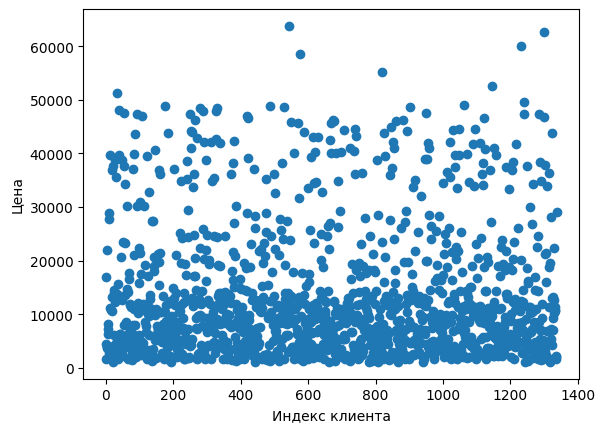

In [14]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

y = insurance_df['charges']

fig, subplot = plt.subplots()
plt.scatter(
    np.arange(len(y)),
    y
)
subplot.set_xlabel('Индекс клиента')
subplot.set_ylabel('Цена')
fig.show()

Получается не очень наглядно - попробуем визуализировать с помощью метода `.hist()` который реализован в pandas

<Axes: >

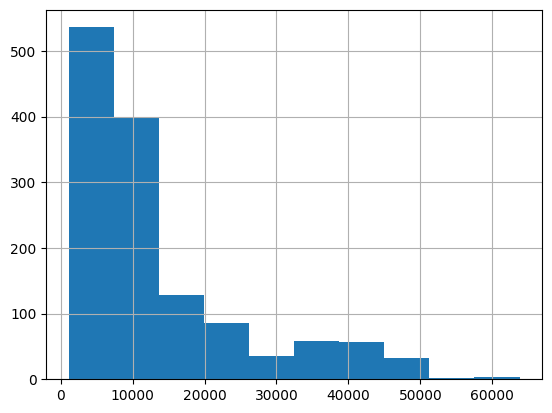

In [15]:
y.hist()

Для каждого объекта построим предсказания с помощью модели линейной регрессии. Воспользуемся как чёрным ящиком питоновским объектом из бибилиотеки [sklearn](https://scikit-learn.org/stable/)

Модели машинного обучения не могут работать с текстом напрямую (вспоминаем лекцию) - а у нас много текстовых полей, их нужно трансформировать в числа - воспользуемся классом `sklearn.preprocessing.LabelEncoder` из библиотеки sklearn

Чтобы преобразовать колонку в текст нужно воспользоватьеся методом [.fit_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit_transform)

In [16]:
from sklearn.preprocessing import LabelEncoder

for label in ['sex', 'smoker', 'region']:
  insurance_df[label] = (
      LabelEncoder()
      .fit_transform(insurance_df[label])
  )

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Распределение фичи

In [17]:
insurance_df['region'].value_counts(normalize=True)

region
2    0.272048
3    0.242900
1    0.242900
0    0.242152
Name: proportion, dtype: float64

Обучим линейную регрессию - это класс [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Что нужно для получения обученной модели
* создать объект
* вызвать метод *.fit()*

Загляните в документацию метода [.fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) который принимает на вход два аргумента

* $X$ - матрица объекты - признаки. Удалите из датафрейма `insurance_df` столбец `charges` и сохраните результат в переменную $X$
* `y` - значение целевой переменной

In [18]:
from sklearn.linear_model import LinearRegression

reg = None  # объект модели линейной регрессии
X = insurance_df.drop(labels='charges', axis=1)

reg = LinearRegression()
print('Начинаем обучение...')
reg.fit(X, y)
print('Модель обучена!')

Начинаем обучение...
Модель обучена!


Добавим к датафрейму столбец `prediction` - так удобнее считать метрики

In [19]:
insurance_df['prediction'] = reg.predict(X)
insurance_df.head(3)

,age,sex,bmi,children,smoker,region,charges,prediction
0,19,0,27.90,0,1,3,16884.9240,25111.241864
1,18,1,33.77,1,0,2,1725.5523,3687.605173
2,28,1,33.00,3,0,2,4449.4620,6963.145707


Визуализируем гистограмму остатков линейной регрессии - это разница между истинным и предсказанным значением.

<Axes: >

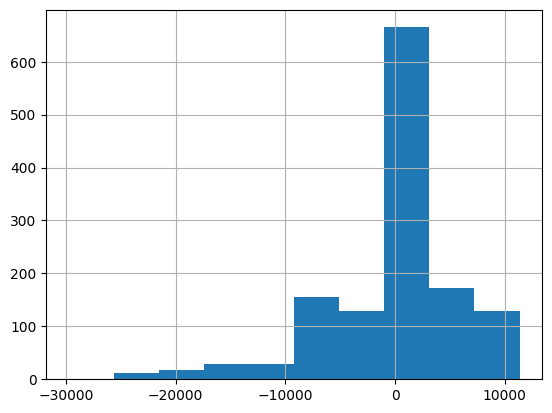

In [20]:
(insurance_df['prediction'] - y).hist()

Кстати, метрику качества необязательно считать вручную - в sklearn реализовано [огромное количество метрик](https://scikit-learn.org/stable/modules/classes.html#regression-metrics) для регрессии (и других задач тоже)

Подробнее о метриках регрессии мы поговорим в дальнейших занятиях

# Интерпретируемость линейной регрессии

Впервые термин *регрессия* в статистике был использован английским исследователем Френсисом Гальтоном (1886) в  исследовании вопроса наследования физических характеристик человека (конкретно - роста человека). Было обнаружено, что в целом сыновья высоких отцов, оказались более высокими, чем сыновья отцов с низким ростом. Более интересным было то, что разброс в росте сыновей был меньшим, чем разброс в росте отцов. Так проявлялась тенденция возвращения роста сыновей к среднему (regression to mediocrity), то есть «регресс». То есть термин очень древний, про ML тогда не сильно думали

Регрессия - это семейство алгоритмов машинного обучения с учителем, цель которых состоит в востановлении **непрерывной** зависимости целевой переменной от фичей.

Интерпретируемость - это способность объяснить что же за модель мы получили, для объяснения нужно ещё раз "закопаться" в математические основы линейной регрессии?

Задача *линейной* регресии: восстановить на функцию $h(x_i)$ в виде *линейной комбинации* (т.е. суммы с некоторыми весами *важности*) признаков объекта. Сами признаки называются *предикторами*:,
$$
\forall x_i: h(x) = w_0 + w_1x_i^1 + \ldots + w_nx_i^n = \sum_{j=1}^{n}w_jx_i^j = \overline{x}_i^T\overline{w}
$$

К признаковому пространству добавляется "фиктивный" признак $x_0=1$, "важность" которого сохраняется в коэффициент $w_0$.

То есть "семейство функций" представляет собой всевозможные комбинации $[w_0, w_1 , w_2 , w_3 , w_4 , w_5 , w_6]$ а метод *.fit()* волшебным образом подбирает их так, чтобы получить максимальное качество.

Мера качества $L$ для задачи регрессии - квадрат разности между фактическим значением и прогнозом. ,
$$
L(h(x_i, \theta), y_i) = \left(y_i - h(x_i, \theta)\right)^2 = \left(y_i -  \sum_{j=1}^{n}w_jx_i^j\right)^2
$$

/var/folders/bd/bg2rzktd7cl7_q4_11m4dx7r0000gn/T/ipykernel_78539/4042109036.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


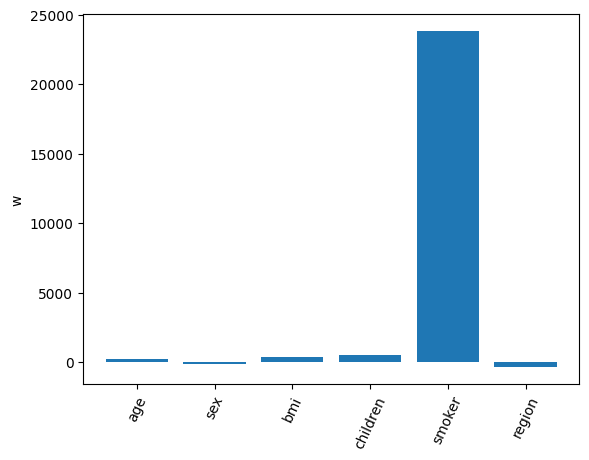

In [21]:
fig, subplot = plt.subplots()
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
subplot.set_xticks(np.arange(len(reg.coef_)))
subplot.set_xticklabels(X.columns.tolist(), rotation=65)
subplot.set_ylabel('w')
fig.show()

# Инженириниг фичей

в нашей модели видно что фича "smoker" оказывает на предсказанное знаение сильное влияние.

Важное примечание: при подготовке данных мы применили `LabelEncoder` - довольно тривиальное решение и может быть поэтому фича "region" сильного влияния не оказала.

В рамках домашней работы примените `OneHotEncoder` и сделайте вывод:
* увеличилось ли качество модели
* как поменялось распределение коэффициентов модели?

Для проверки качества используйте любую метрику

### Инженирим фичи для регрессии


Допустим, у нас есть нормализованные данные по количеству просмотров контента в онлайн-кинотеатре ivi

* в датасете всего одна фича: время, когда было сделано наблюдение
* целевая переменная - количество просмотров в этот момент времени

Мы хотим научиться предсказывать количество просмотров (напрерывную переменную) по времения суток

Реализация этого алгоритма есть в библиотеке sklearn

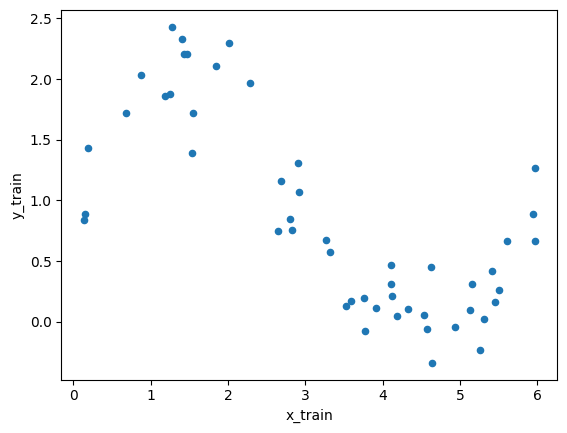

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

regression_data_file_path = os.path.join(root_data_dir, 'non_linear.csv')
df = pd.read_csv(regression_data_file_path, encoding='utf8')
df.plot.scatter(x='x_train', y='y_train')
plt.show()

Разделим данные на тренировочный тестовый сет

/var/folders/bd/bg2rzktd7cl7_q4_11m4dx7r0000gn/T/ipykernel_78539/3217812924.py:19: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')


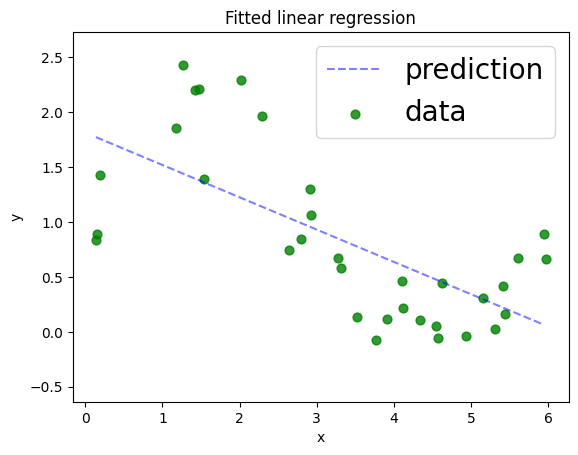

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df['x_train'].values
y = df['y_train'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

# строим график
margin = 0.3
support = np.arange(X.min(), X.max(), step=0.1)

# строим предсказание
y_hat = reg.predict(support.reshape(-1, 1))

plt.plot(support, y_hat, 'b--', alpha=0.5, label='prediction')
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Если вспомнить модель линейной регрессии, то обучение модели сводится к нахождению коэффициентов $w_1,\ldots,w_n$:
$$
\forall x_i: h(x) = w_0 + w_1x_i^1 + \ldots + w_nx_i^n = \sum_{j=1}^{n}w_jx_i^j = \overline{x}_i^T\overline{w}
$$

"Достать" коэффициенты из модели можно через аттрибут `coef_`:

In [25]:
print(
    f'коэффициенты линейной регрессии w={reg.coef_},',
    f'качество модели {reg.score(X_test.reshape(-1,1), y_test)}'
)

коэффициенты линейной регрессии w=[-0.29424462], качество модели 0.583109874086522


Линейная регрессия очень хорошо интерпретируется: чем больше по модулю значение коэффициента $w_i$, тем сильнее фича $x_i$ влияет на предсказания модели.

Кажется, что линейная комбинация фичей сильно ограничивает модель и не позволяет улавливать сложные зависимости.

Чтобы модель улавливала нелинейные зависимости, мы можем добавить в датасет степени исходной переменной. Допустим, построим предсказания на полиноме пятой степени:

/var/folders/bd/bg2rzktd7cl7_q4_11m4dx7r0000gn/T/ipykernel_78539/1635292535.py:21: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')


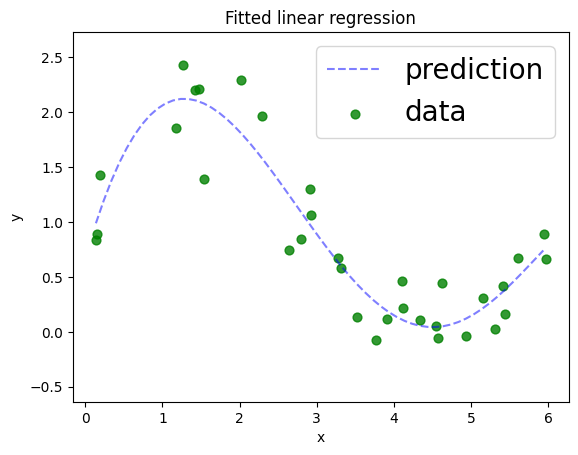

In [26]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)
    ]).T

X_train_5 = generate_degrees(X_train, 5)
X_test_5 = generate_degrees(X_test, 5)
reg_5 = LinearRegression().fit(X_train_5, y_train)

# строим график
margin = 0.3
support = np.arange(X.min(), X.max(), step=0.1)

X_test_support = generate_degrees(support, 5)
y_hat = reg_5.predict(X_test_support)

plt.plot(support, y_hat, 'b--', alpha=0.5, label='prediction')
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Посмотрим на модель, которая у нас обучилась - вместо одной фичи в матрице **объекты $\times$ признаки** стало пять фичей

In [27]:
print(
    f'коэффициенты линейной регрессии w={reg_5.coef_},\n',
    f'качество модели {reg_5.score(X_test_5, y_test):.4f}'
)

коэффициенты линейной регрессии w=[ 2.48283062e+00 -1.19385669e+00  8.71731563e-02  2.15650198e-02
 -2.38912640e-03],
 качество модели 0.9123


качество модели тоже выросло, супер

## Случайный лес

Алгорим случайного можно применять для регрессии аналогично тому, как он применяется для классификации

* рандомизировано построить несколько деревьев
* каждое дерево независимо предсказывает значение в точке
* итоговое предсказание - усреднённое значение предсказаний деревьев ансамбля

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10).fit(X_train.reshape(-1, 1), y_train)
print(
    f'коэффициенты важности фичей w={rf.feature_importances_},',
    f'качество модели {rf.score(X_train.reshape(-1, 1), y_train):.4f}'
)

коэффициенты важности фичей w=[1.], качество модели 0.9747


# Выводы (предварительные)

* в задаче обучения с учителем обязательно нужно тратить время на разметку
* проблема дисбаланса классов
* можно слишком сильно подогнать модель под обучающую выборку - это явление переобучения, о нём поговорим в следующих занятиях

## Итоги занятия

* ML позволяет решать бизнес-задачи
* внутри не магия, а очень много математики
* все алгоритмы есть в sklearn, самому математику знать необязательно
* feature engineering - важнейший этап

# Жизненный цикл ML проекта

Мы познакомились с машинным обучением на примере алгоритма регрессии.

В бизнесе моделирование - это только маленькая часть проекта по машинному обучению, который состоит из нескольких этапов. Эти этапы описаны в стандарте CRISP-DM

## Что такое CRISP-DM

[CRISP-DM](https://ru.wikipedia.org/wiki/CRISP-DM) (Cross-Industry Standard Process for Data Mining) - это методология развития  проектов с машинным обучением, основные шаги которой представлены на диаграмме

![crisp-dm](img/CRISP-DM_Process.jpg)

## Выявление бизнес-требований

Самый важный этап - понимание потребностей бизнеса

![business_understanding](img/business_understanding.png)

## Подготовка данных

Разбиваем на два этапа:

* Обзор доступных данных (data undestanding): EDA (Exploratory data analysis)
* Преобразования и структурирование данных (data_preparation): ETL (Extract, transformation, load)

![data_understanding.png](img/data_understanding.png)

## Обучение модели

тут снова два этапа

* обучение (Modeling)
* оценка качества (Evaluation)

## Применение модели

Выкатывание в продакшн (deployment) - последний этап.

На этом этапе поделие выпускается "в свет": начинаем мониторить онлайн-метрики

## Итоги занятия

* ML проекты рождаются, растут и выкатываются в прод
* плохо прошёл хотя бы один из этапов - весь проект завалится, потому что они связаны

# Виды ML задач

Алгоритмы машинного обучения можно разделить на несколько больших групп

![ml_problems.jpg](img/ml_problems.jpeg)

Для наглядности к каждому типу задач ML приведены бизнес-задачи, который алгоритмы этого семейства решают

## Обучение с учителем (supervised learning)

Нужна размеченная выборка

### Классификация (classification)

Метки дискретные (называются классами)

### Регрессия (regression)

Метки непрерывные


## Обучение без учителя (unsupervised learning)

Размечать выборку не нужно

### Кластеризация (clustering)

Разделить объекты на группы таким образом

### Снижение размерности (dimension reduction)

снизить количество фичей


## Обучение с подкреплением (reinforcement learning)

Обучающей выборки не существует. Алгоритм является агентом, который взаимодействует со средой. Если взаимодействие успешное, агент получает вознаграждение, а если неуспешное то штраф.

# Для самостоятельного изучения

* [Введение в ML от Константина Воронцова](http://www.machinelearning.ru/wiki/images/f/fc/Voron-ML-Intro-slides.pdf)
* [ML intro от Высшей школы экономики](https://yadi.sk/i/RajIebEkmqgzw)